# Helpful notes and general measurement tips

- **Spectrum Analyzer:** The spectrum analyzer tends to timeout if it hasn't been used in a while. To restart it, simply execute the qubit initialization again or use the qb._instrument.set() command to send a value and wake the instrument back up.
- 

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from qubit import qubit
import numpy as np
import plot_functions as pf
from helper_functions import load_data

2024-10-10 12:52:10,933 - qm - INFO     - Starting session: 1cc431af-9376-428f-96df-1ab5afb9866a


# Initialize qubit

In [114]:
qb = qubit('DARPA-LL-6')

Loading parameter JSON file
Removing rr_resettime from pars
2024-10-10 15:42:00,595 - qm - INFO     - Performing health check
2024-10-10 15:42:00,608 - qm - INFO     - Health check passed
Loading instrument settings from experiments\DARPA-LL-6\DARPA-LL-6_instruments.json.
Initializing readout_LO (SignalCore SC5511A Signal Generator).
Initializing qubit_LO (SignalCore SC5511A Signal Generator).
Initializing DA (Vaunix Lab Brick Digital Attenuator).
Initializing sa (SignalHound SpectrumAnalyzer).
Setting qubit_LO frequency to 5000000000.0.
Setting qubit_LO power to 15.
Setting qubit_LO output to True.
Setting DA attenuation to 27.


# Time of flight

Updating readout_atten to 30
Setting DA attenuation to 30.
Updating n_avg to 200
Updating rr_IF to 20000000.0
Updating readout_length to 1000
2024-10-10 12:57:09,536 - qm - INFO     - Performing health check
2024-10-10 12:57:09,548 - qm - INFO     - Health check passed
2024-10-10 12:57:09,698 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 12:57:09,737 - qm - INFO     - Executing program
Updating tof to 240
Input 1 Offset: 0.05531932689525463 mV
Input 2 Offset: 0.20693065502025462 mV
Updating analog_input_offsets to [0.04506069268120659, 0.06754865406177664]


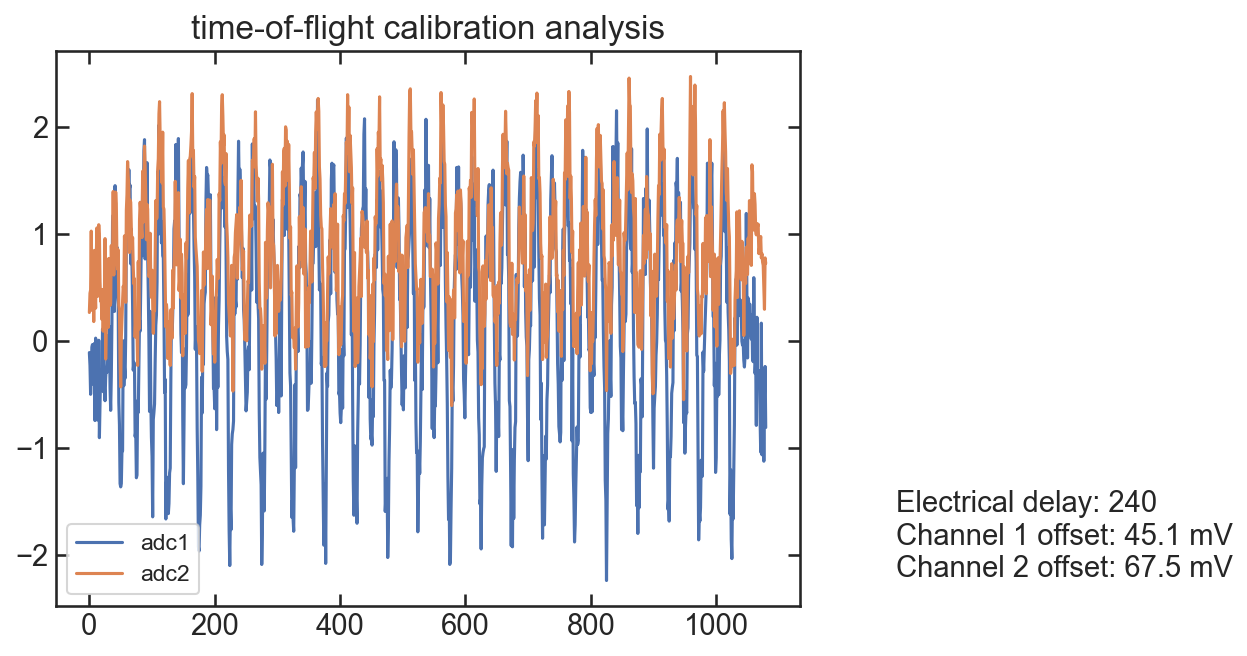

In [13]:
qb.update_value('readout_atten',30)
# qb.update_value('tof',200)
# qb.update_value('smearing',10)
# qb.update_value('tof',100)
# qb.update_value('amp_r',0.4)
qb.pars['resettime']['rr'] = 5000
qb.write_pars()
# qb.update_value('tof', 100)
qb.update_value('n_avg',200)
qb.update_value('rr_IF',20e6)
qb.update_value('readout_length',1000)

adc1,adc2 = qb.tof_cal(update_tof=True)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

In [19]:
len(adc1)
# qb.update_value('tof',0)

1080

# Optimize Mixers

## Minimize LO leakage 

Setting sa frequency to 6400000000.0.
Setting sa span to 1000000.0.
Setting sa threshold to 20.
Setting sa bandwidth to 100.0.


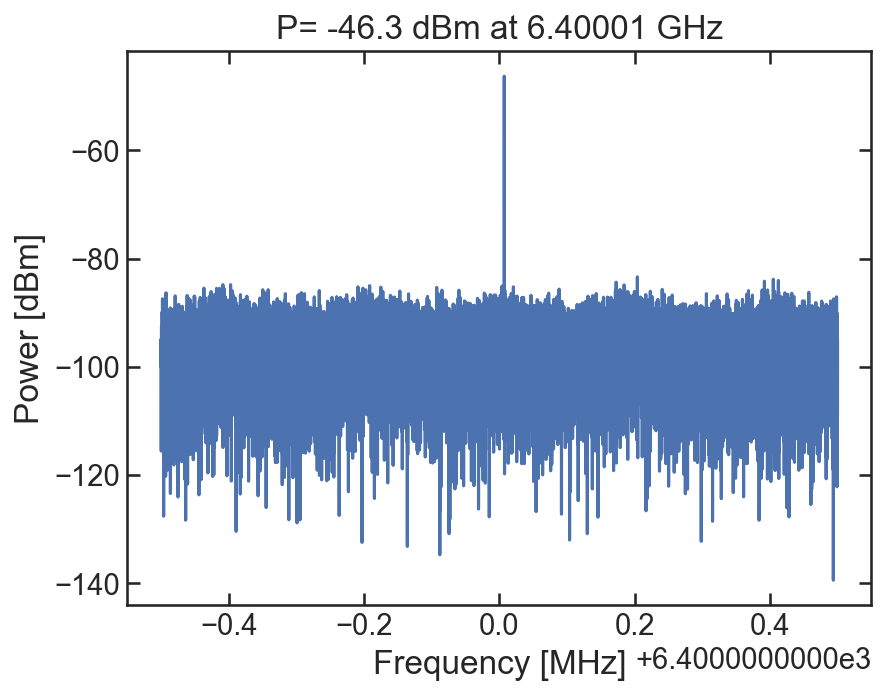

-46.25935363769531 dBm at 6.400007192090408 GHz
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 6400000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 100.0.
LO at 6.4 GHz
Current I_offset = -10.1 mV, Current Q_offset = 2.9 mV
Setting sa frequency to 6400000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -26.550270080566406.
Setting sa bandwidth to 100.0.


100%|██████████| 121/121 [00:42<00:00,  2.82it/s]


Updating rr_mixer_offsets to [-0.01515, 0.003850000000000001]
optimal I_offset = -15.2 mV, optimal Q_offset = 3.9 mV
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -77.57171630859375 dBm at 6.4 GHz


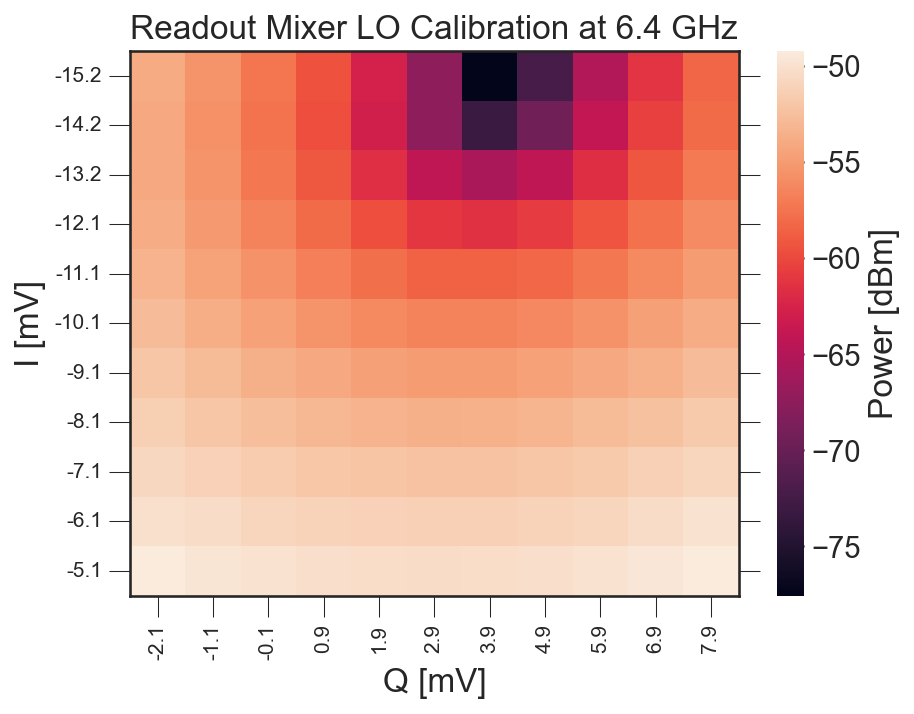

In [31]:
#qb.update_value('rr_LO',6.4e9)
qb.get_power(fc=qb.pars['rr_LO'],threshold=20,sa_span=1e6,config=True,plot=True)
qb.opt_lo_leakage(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 6400000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -40.
Setting sa bandwidth to 100.0.
LO at 6.4 GHz
Current I_offset = -15.2 mV, Current Q_offset = 3.9 mV
Setting sa frequency to 6400000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -57.68733215332031.
Setting sa bandwidth to 100.0.


100%|██████████| 121/121 [00:42<00:00,  2.82it/s]


Updating rr_mixer_offsets to [-0.015199999999999995, 0.0038000000000000013]
optimal I_offset = -15.2 mV, optimal Q_offset = 3.8 mV
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -75.96958923339844 dBm at 6.4 GHz


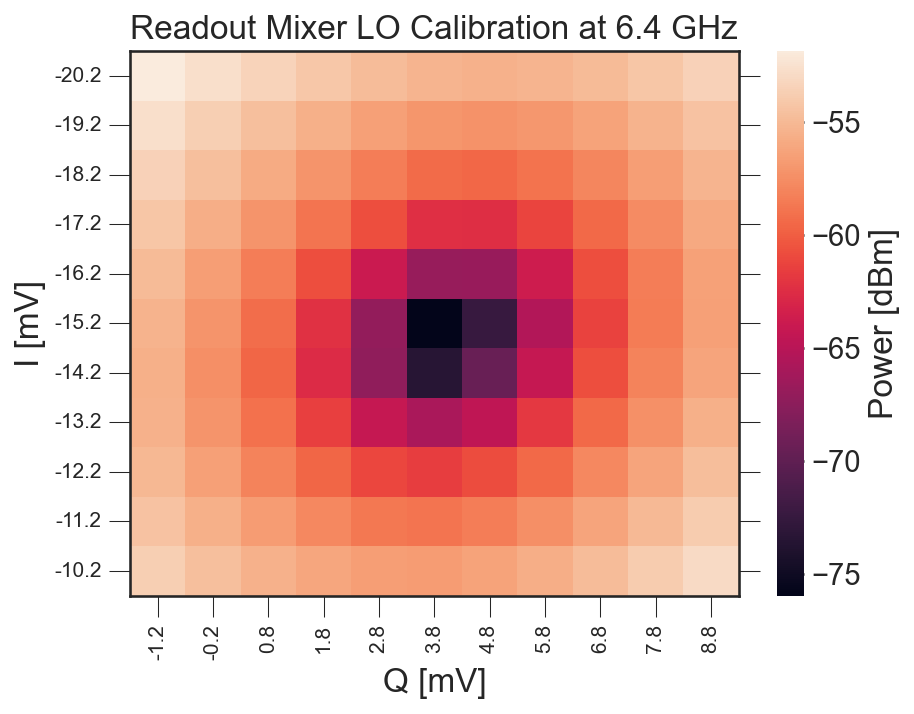

In [32]:
qb.opt_lo_leakage(mode='coarse',element='rr',sa_span=0.5e6,threshold=-40,plot=True)

## Minimize image sideband

2024-09-25 17:15:45,785 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 17:15:45,810 - qm - INFO     - Executing program
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 6312250000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 100.0.


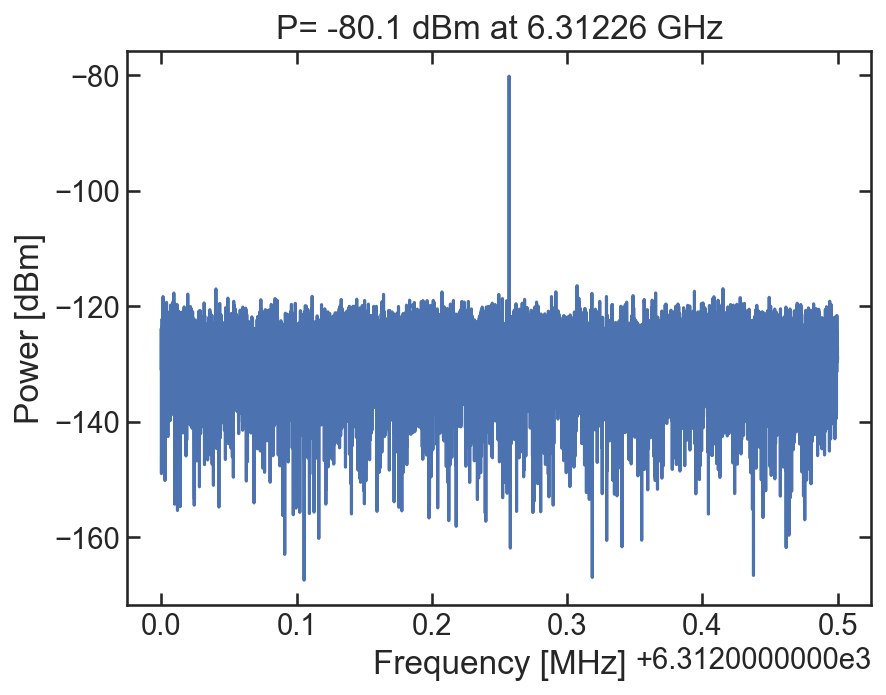

-80.1219482421875 dBm at 6.312257159488692 GHz
Sideband at 6.31225 GHz
Current gain = -0.0028, Current phase = -0.0667


100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


Updating rr_mixer_imbalance to (0.008333333333333331, -0.09444444444444444)
optimal gain = 0.0083, optimal phi = -0.0944
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -63.17869567871094 dBm at 6.31225 GHz


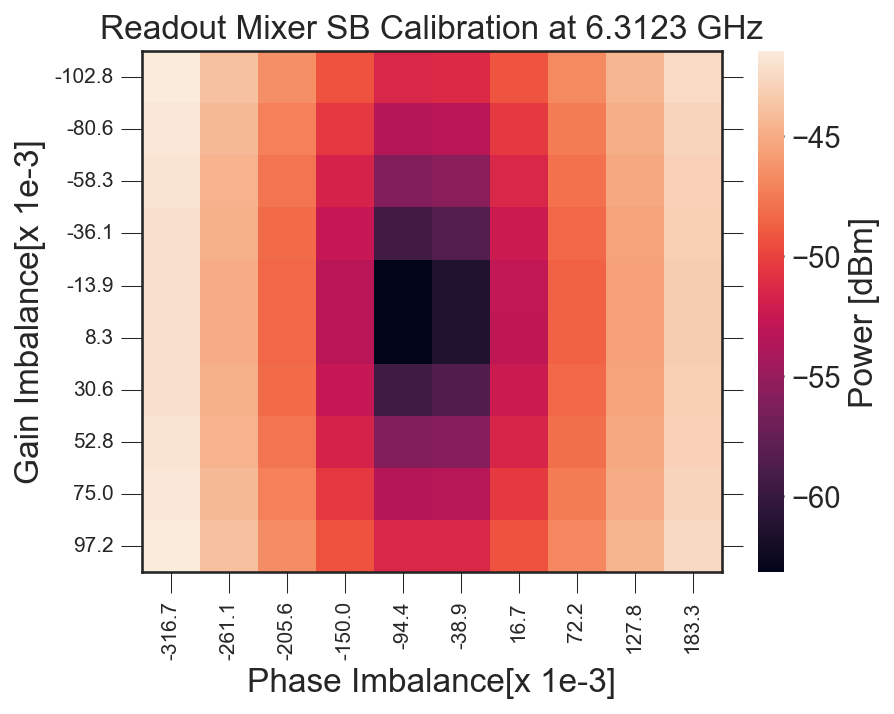

In [33]:
# qb.update_value('rr_IF',50e6)
qb.opt_sideband(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

2024-09-25 16:21:31,255 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 16:21:31,292 - qm - INFO     - Executing program
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 6380000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -50.
Setting sa bandwidth to 100.0.


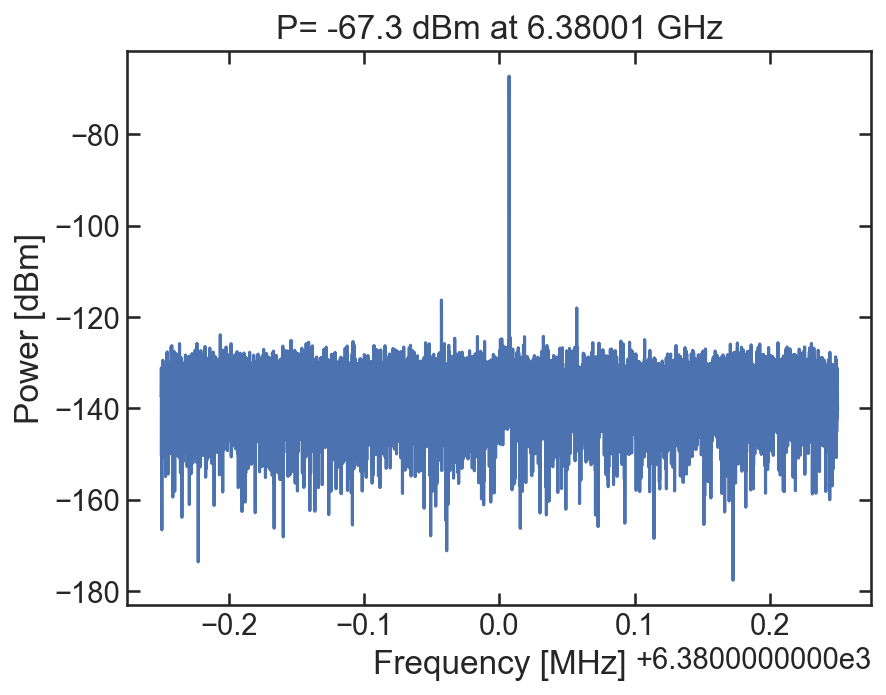

-67.34053039550781 dBm at 6.380007186350242 GHz
Sideband at 6.38 GHz
Current gain = -0.0111, Current phase = -0.0833


100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


Updating rr_mixer_imbalance to (-0.002777777777777782, -0.06666666666666668)
optimal gain = -0.0028, optimal phi = -0.0667
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -82.15008544921875 dBm at 6.38 GHz


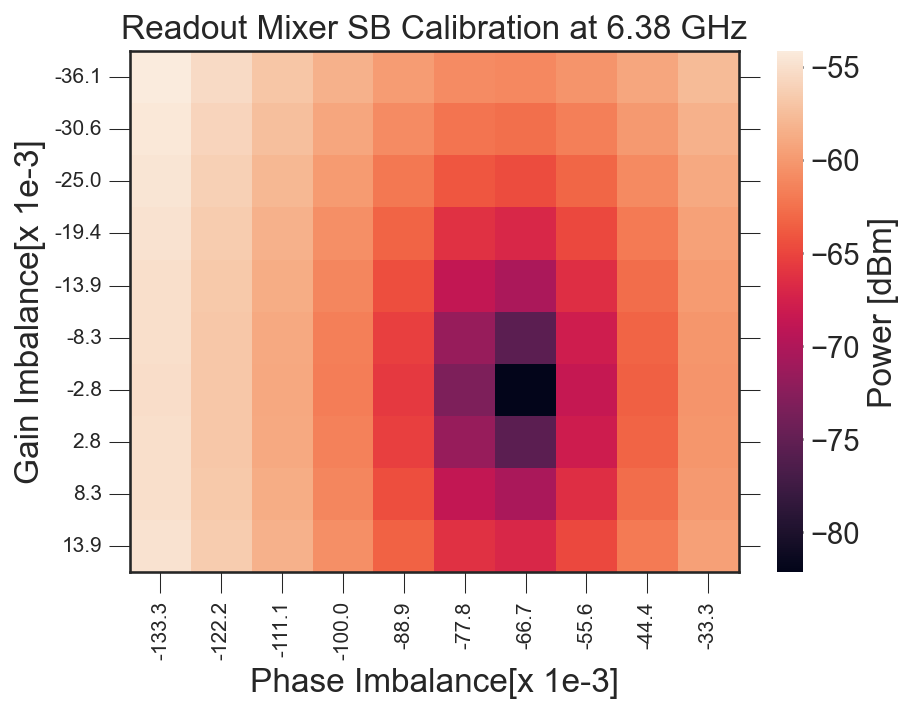

In [9]:
qb.opt_sideband(mode='fine',element='rr',sa_span=0.5e6,threshold=-50,plot=True)

# Resonator spectroscopy

**Notes on resonator spectroscopy**

In [87]:
qb.update_value('readout_length', 10000)   ##wanted a clearer peak
# qb.update_value('tof',256)
# qb.update_value('smearing',60)
qb.update_value('rr_resettime',5000)
# qb.pars['resettime']['rr'] = 2000|
qb.write_pars()
qb.update_value('n_avg',300)
qb.update_value('readout_atten',0)
qb.update_value('switch_weights',False)
# qb.update_value('amp_r',0.4)
df_resonator_spec = 0.75e3
qb.experiment = 'resonator_spec'
##added a 10db fixed attenuator on rr line after the spiltter and just before fridge input
data, job = qb.resonator_spec(
                       f_LO = 6.9e9,
                       IF_min = 78e6,
                       IF_max = e6,
                       df = df_resonator_spec,
                       fit=True,
                       on_off=False,
                       savedata=False,
                       showprogress=True)

Updating readout_length to 10000
Updating rr_resettime to 5000
Updating n_avg to 300
Updating readout_atten to 0
Setting DA attenuation to 0.
Updating switch_weights to False
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:14:18,862 - qm - INFO     - Performing health check
2024-10-10 14:14:18,876 - qm - INFO     - Health check passed
2024-10-10 14:14:19,652 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:14:19,994 - qm - INFO     - Executing program


100%|█████████▉| 299/300 [00:24<00:00, 12.30it/s]


Resonant Frequency: 6.97904 GHz
FWHM = 21.75 kHz
kappa = 136.659 kHz


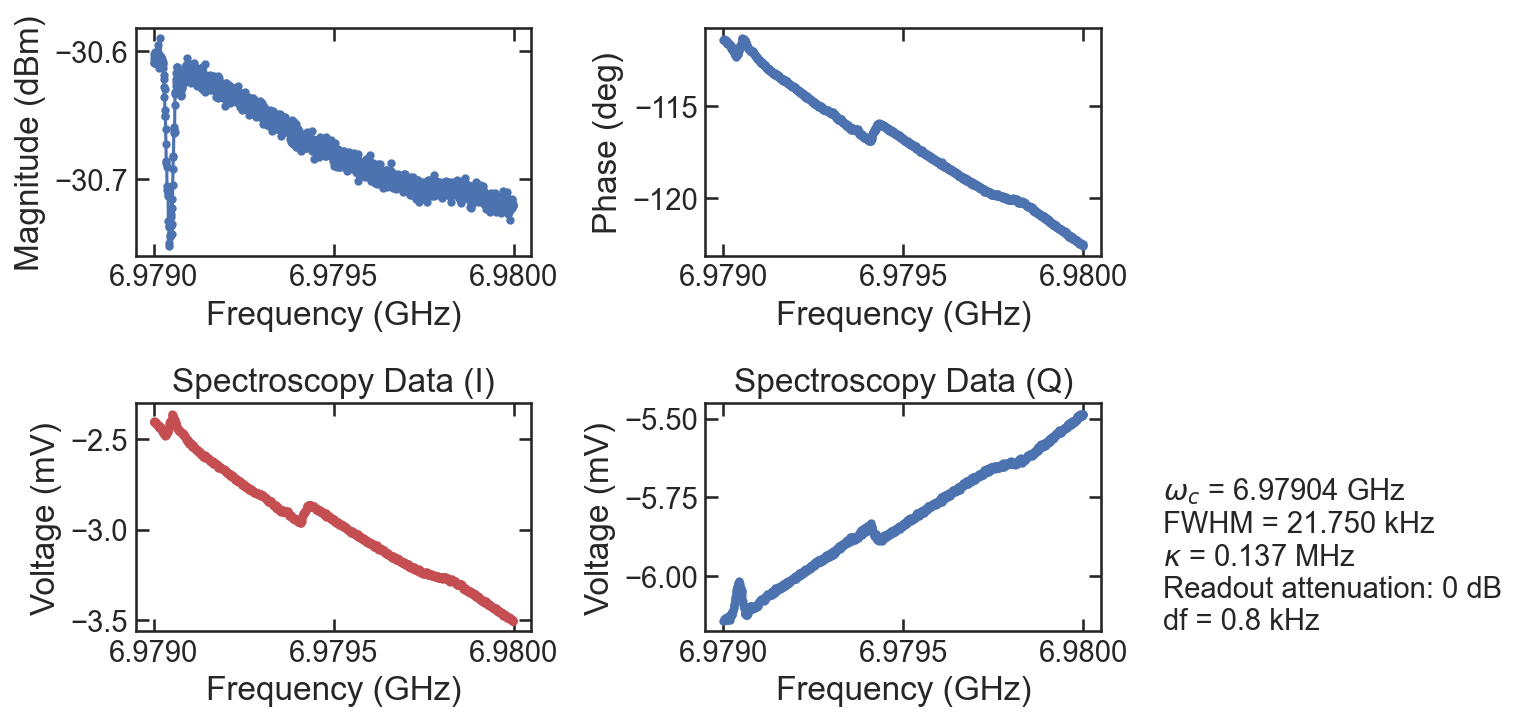

In [88]:
fc,fwhm = pf.fit_res(data['freqs'],data['I'],data['Q'])
pf.resonator_spec_plot(data,qb_pars=qb.pars,fwhm=fwhm,fc=fc)

In [28]:
fc

6487750000.0

In [26]:
qb.update_value('rr_freq',fc)
qb.update_value('rr_IF', fc-qb.pars['rr_LO'])

Updating rr_freq to 6979663500.0
Updating rr_IF to 79663500.0


In [27]:
from resonator import Resonator

In [ ]:
(fc-3*fwhm)*1e-9
(fc+3*fwhm)*1e-9

302480.0335489032
0.488548079520934 302479.97234432667 6979664439.711939
[4.88548080e-01 3.02479972e+05 6.97966444e+09]
302988.5642835161
-0.08471421028661966 302984.77461413003 6979664465.697782
[-8.47142103e-02  3.02984775e+05  6.97966447e+09]


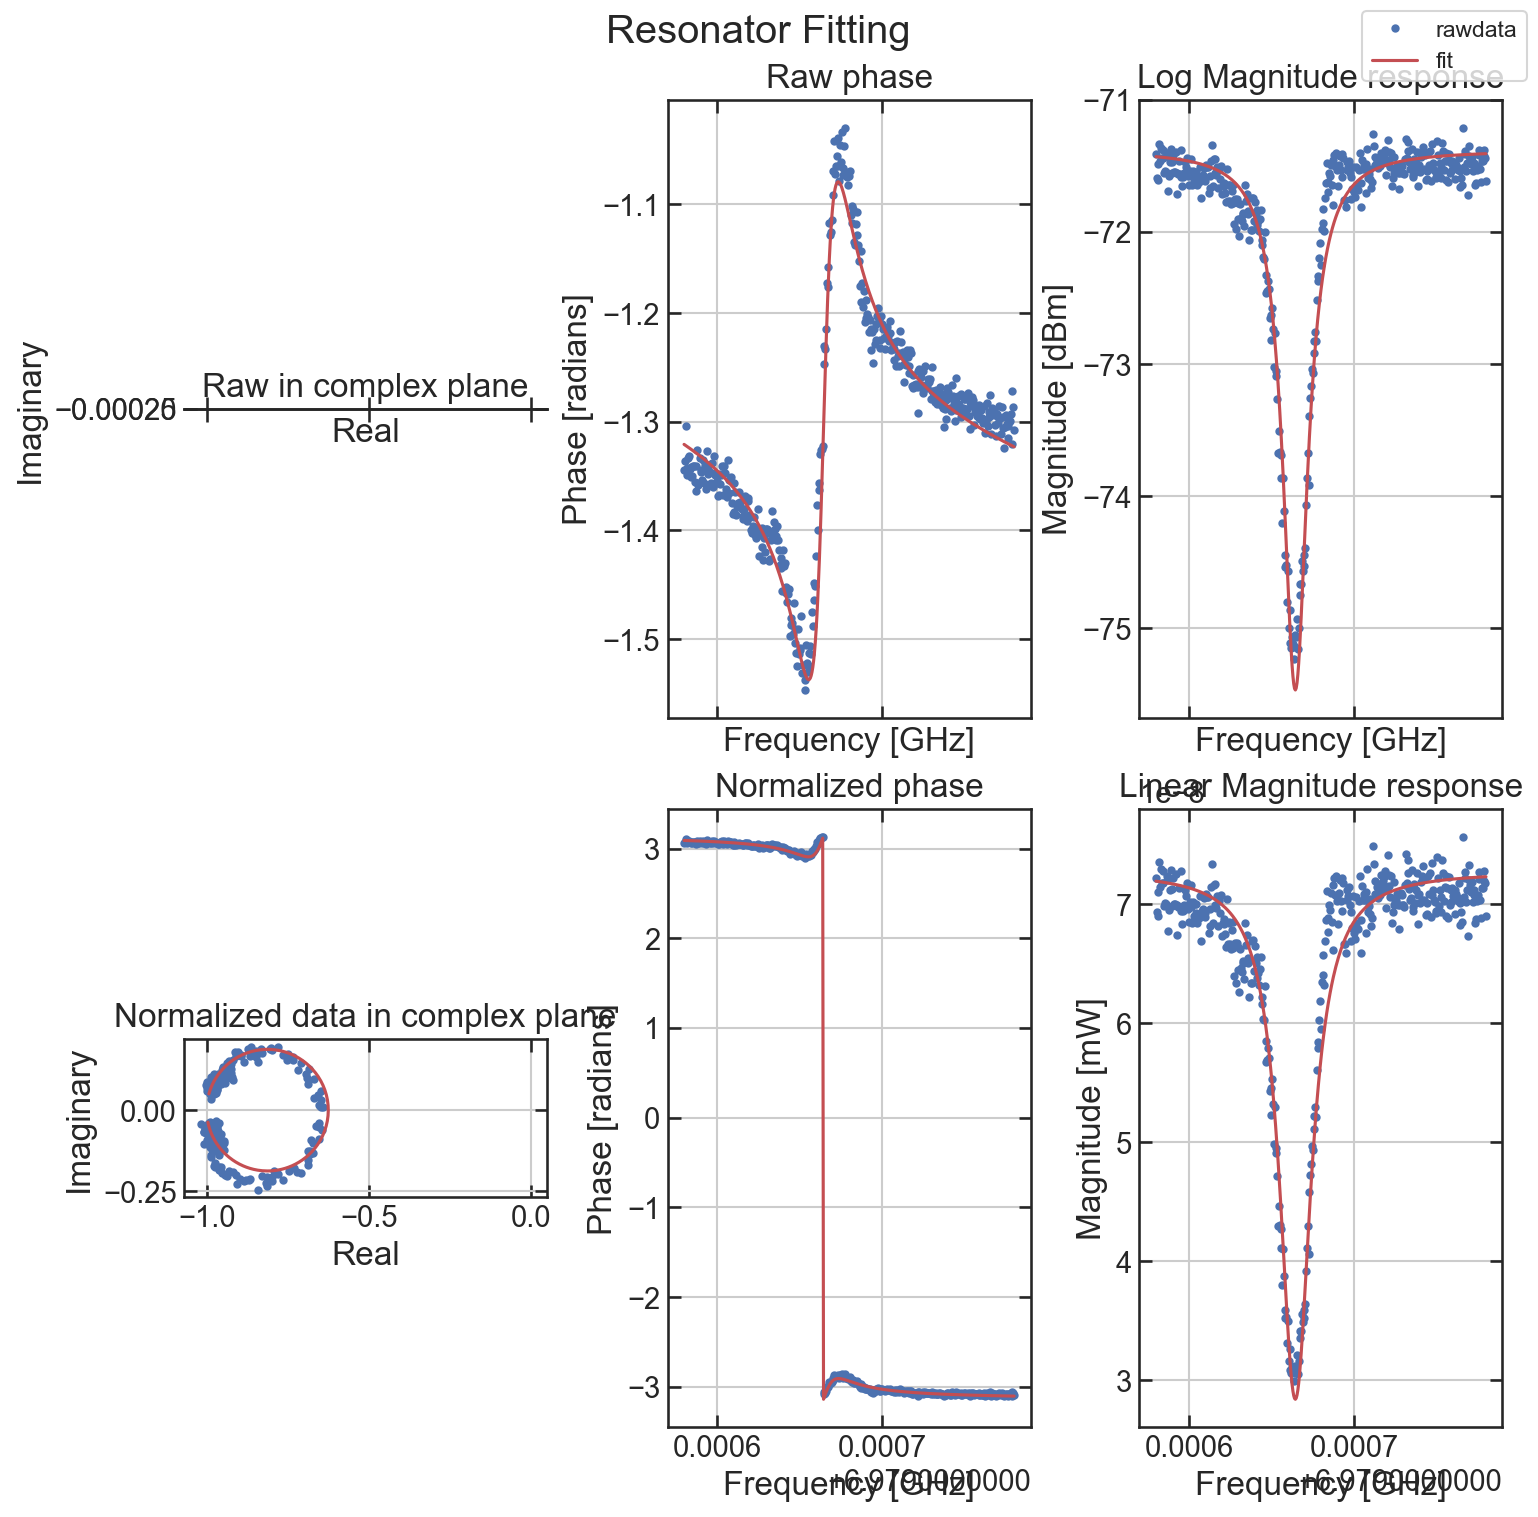

Frequency: 6.9797 GHz
Total Q: 302985
Internal Q: 372978
Coupling Q: 1614541
FWHM: 0.02304 MHz
Kappa: 0.14474 MHz
Single Photon Power: -150.5 dBm
Ringdown Time: 9.578 us
Impedance Mismatch 4.851 degrees
Electrical Delay: 71.607895 ns
SNR: 10383020014.5


In [32]:
res = Resonator(port_type='r',f_data=data['freqs'],z_data=data['I']+1j*data['Q'])
# delay = np.linspace(-100,100,100)
# for d in delay:
res.autofit()
    # if res.fit_found:
    #     print(d)
    #     break
res.show()
print(res)

# res.show()
# qb.update_value('rr_IF', res.f0-qb.pars['rr_LO'])


# Qubit Punchout

**Notes on qubit punchout**

*Objectives*
1. Determine if there is a qubit coupled to a cavity.
2. Determine the readout power at which the qubit is punched out. Used for subsequent measurements.

Starting at low readout power and then gradually decreasing the attenuation, you should see the readout resonance shift in frequency. Since the qubit and readout resonances repel each other, if the qubit frequency is less than the readout frequency, the resonant frequency whill shift to lower frequency after the qubit is punched out, and vice versa. Between the high and low readout power frequencies, the resonator behaves in a non-linear way. We definitely want to operate outside of that region. 

In [93]:
attenuations = np.linspace(0,35,25)
qb.update_value('n_avg',50)
data, job = qb.punchout(df = 0.75e3,
                       IF_min = 79e6,
                       IF_max = 79.72e6,
                        attenuations=attenuations,
                        adaptive_averaging=True,
                        averaging_factor=1.1,
                        savedata=False)

Updating n_avg to 50


  0%|          | 0/25 [00:00<?, ?it/s]

Attenuation = 0.0 dB
Setting DA attenuation to 0.0.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:19:33,115 - qm - INFO     - Performing health check
2024-10-10 14:19:33,139 - qm - INFO     - Health check passed
2024-10-10 14:19:33,797 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:19:34,109 - qm - INFO     - Executing program


  4%|▍         | 1/25 [00:05<02:17,  5.74s/it]

Updating n_avg to 55
Attenuation = 1.4583333333333333 dB
Setting DA attenuation to 1.4583333333333333.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:19:38,835 - qm - INFO     - Performing health check
2024-10-10 14:19:38,848 - qm - INFO     - Health check passed
2024-10-10 14:19:39,615 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:19:39,922 - qm - INFO     - Executing program


  8%|▊         | 2/25 [00:11<02:18,  6.03s/it]

Updating n_avg to 60
Attenuation = 2.9166666666666665 dB
Setting DA attenuation to 2.9166666666666665.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:19:45,060 - qm - INFO     - Performing health check
2024-10-10 14:19:45,088 - qm - INFO     - Health check passed
2024-10-10 14:19:45,865 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:19:46,169 - qm - INFO     - Executing program


 12%|█▏        | 3/25 [00:18<02:19,  6.32s/it]

Updating n_avg to 66
Attenuation = 4.375 dB
Setting DA attenuation to 4.375.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:19:51,768 - qm - INFO     - Performing health check
2024-10-10 14:19:51,803 - qm - INFO     - Health check passed
2024-10-10 14:19:52,524 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:19:52,818 - qm - INFO     - Executing program


 16%|█▌        | 4/25 [00:25<02:20,  6.67s/it]

Updating n_avg to 72
Attenuation = 5.833333333333333 dB
Setting DA attenuation to 5.833333333333333.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:19:58,959 - qm - INFO     - Performing health check
2024-10-10 14:19:58,993 - qm - INFO     - Health check passed
2024-10-10 14:19:59,828 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:20:00,128 - qm - INFO     - Executing program


 20%|██        | 5/25 [00:33<02:21,  7.07s/it]

Updating n_avg to 79
Attenuation = 7.291666666666666 dB
Setting DA attenuation to 7.291666666666666.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:20:06,750 - qm - INFO     - Performing health check
2024-10-10 14:20:06,763 - qm - INFO     - Health check passed
2024-10-10 14:20:07,449 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:20:07,724 - qm - INFO     - Executing program


 24%|██▍       | 6/25 [00:41<02:21,  7.47s/it]

Updating n_avg to 86
Attenuation = 8.75 dB
Setting DA attenuation to 8.75.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:20:14,951 - qm - INFO     - Performing health check
2024-10-10 14:20:14,963 - qm - INFO     - Health check passed
2024-10-10 14:20:15,730 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:20:16,014 - qm - INFO     - Executing program


 28%|██▊       | 7/25 [00:50<02:22,  7.94s/it]

Updating n_avg to 94
Attenuation = 10.208333333333332 dB
Setting DA attenuation to 10.208333333333332.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:20:23,884 - qm - INFO     - Performing health check
2024-10-10 14:20:23,896 - qm - INFO     - Health check passed
2024-10-10 14:20:24,592 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:20:24,858 - qm - INFO     - Executing program


 32%|███▏      | 8/25 [01:00<02:23,  8.46s/it]

Updating n_avg to 103
Attenuation = 11.666666666666666 dB
Setting DA attenuation to 11.666666666666666.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:20:33,453 - qm - INFO     - Performing health check
2024-10-10 14:20:33,467 - qm - INFO     - Health check passed
2024-10-10 14:20:34,121 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:20:34,387 - qm - INFO     - Executing program


 36%|███▌      | 9/25 [01:10<02:24,  9.04s/it]

Updating n_avg to 113
Attenuation = 13.125 dB
Setting DA attenuation to 13.125.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:20:43,867 - qm - INFO     - Performing health check
2024-10-10 14:20:43,881 - qm - INFO     - Health check passed
2024-10-10 14:20:45,000 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:20:45,327 - qm - INFO     - Executing program


 40%|████      | 10/25 [01:22<02:28,  9.87s/it]

Updating n_avg to 124
Attenuation = 14.583333333333332 dB
Setting DA attenuation to 14.583333333333332.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:20:55,591 - qm - INFO     - Performing health check
2024-10-10 14:20:55,604 - qm - INFO     - Health check passed
2024-10-10 14:20:56,413 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:20:56,674 - qm - INFO     - Executing program


 44%|████▍     | 11/25 [01:34<02:28, 10.61s/it]

Updating n_avg to 136
Attenuation = 16.041666666666664 dB
Setting DA attenuation to 16.041666666666664.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:21:07,802 - qm - INFO     - Performing health check
2024-10-10 14:21:07,814 - qm - INFO     - Health check passed
2024-10-10 14:21:08,762 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:21:09,046 - qm - INFO     - Executing program


 48%|████▊     | 12/25 [01:48<02:29, 11.48s/it]

Updating n_avg to 149
Attenuation = 17.5 dB
Setting DA attenuation to 17.5.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:21:21,266 - qm - INFO     - Performing health check
2024-10-10 14:21:21,279 - qm - INFO     - Health check passed
2024-10-10 14:21:21,957 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:21:22,278 - qm - INFO     - Executing program


 52%|█████▏    | 13/25 [02:02<02:28, 12.35s/it]

Updating n_avg to 163
Attenuation = 18.958333333333332 dB
Setting DA attenuation to 18.958333333333332.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:21:35,590 - qm - INFO     - Performing health check
2024-10-10 14:21:35,601 - qm - INFO     - Health check passed
2024-10-10 14:21:36,346 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:21:36,626 - qm - INFO     - Executing program


 56%|█████▌    | 14/25 [02:18<02:26, 13.33s/it]

Updating n_avg to 179
Attenuation = 20.416666666666664 dB
Setting DA attenuation to 20.416666666666664.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:21:51,202 - qm - INFO     - Performing health check
2024-10-10 14:21:51,215 - qm - INFO     - Health check passed
2024-10-10 14:21:51,891 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:21:52,161 - qm - INFO     - Executing program


 60%|██████    | 15/25 [02:35<02:24, 14.42s/it]

Updating n_avg to 196
Attenuation = 21.875 dB
Setting DA attenuation to 21.875.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:22:08,171 - qm - INFO     - Performing health check
2024-10-10 14:22:08,183 - qm - INFO     - Health check passed
2024-10-10 14:22:08,997 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:22:09,280 - qm - INFO     - Executing program


 64%|██████▍   | 16/25 [02:53<02:20, 15.66s/it]

Updating n_avg to 215
Attenuation = 23.333333333333332 dB
Setting DA attenuation to 23.333333333333332.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:22:26,689 - qm - INFO     - Performing health check
2024-10-10 14:22:26,701 - qm - INFO     - Health check passed
2024-10-10 14:22:27,441 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:22:27,712 - qm - INFO     - Executing program


 68%|██████▊   | 17/25 [03:13<02:16, 17.01s/it]

Updating n_avg to 236
Attenuation = 24.791666666666664 dB
Setting DA attenuation to 24.791666666666664.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:22:46,846 - qm - INFO     - Performing health check
2024-10-10 14:22:46,861 - qm - INFO     - Health check passed
2024-10-10 14:22:47,622 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:22:47,878 - qm - INFO     - Executing program


 72%|███████▏  | 18/25 [03:35<02:09, 18.51s/it]

Updating n_avg to 259
Attenuation = 26.25 dB
Setting DA attenuation to 26.25.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:23:08,838 - qm - INFO     - Performing health check
2024-10-10 14:23:08,850 - qm - INFO     - Health check passed
2024-10-10 14:23:09,592 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:23:09,908 - qm - INFO     - Executing program


 76%|███████▌  | 19/25 [03:59<02:01, 20.17s/it]

Updating n_avg to 284
Attenuation = 27.708333333333332 dB
Setting DA attenuation to 27.708333333333332.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:23:33,007 - qm - INFO     - Performing health check
2024-10-10 14:23:33,022 - qm - INFO     - Health check passed
2024-10-10 14:23:33,871 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:23:34,135 - qm - INFO     - Executing program


 80%|████████  | 20/25 [04:26<01:50, 22.03s/it]

Updating n_avg to 312
Attenuation = 29.166666666666664 dB
Setting DA attenuation to 29.166666666666664.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:23:59,626 - qm - INFO     - Performing health check
2024-10-10 14:23:59,640 - qm - INFO     - Health check passed
2024-10-10 14:24:00,879 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:24:01,173 - qm - INFO     - Executing program


 84%|████████▍ | 21/25 [04:55<01:37, 24.28s/it]

Updating n_avg to 343
Attenuation = 30.625 dB
Setting DA attenuation to 30.625.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:24:28,892 - qm - INFO     - Performing health check
2024-10-10 14:24:28,906 - qm - INFO     - Health check passed
2024-10-10 14:24:29,573 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:24:29,924 - qm - INFO     - Executing program


 88%|████████▊ | 22/25 [05:27<01:19, 26.42s/it]

Updating n_avg to 377
Attenuation = 32.08333333333333 dB
Setting DA attenuation to 32.08333333333333.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:25:00,177 - qm - INFO     - Performing health check
2024-10-10 14:25:00,189 - qm - INFO     - Health check passed
2024-10-10 14:25:00,919 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:25:01,214 - qm - INFO     - Executing program


 92%|█████████▏| 23/25 [06:01<00:57, 28.78s/it]

Updating n_avg to 414
Attenuation = 33.541666666666664 dB
Setting DA attenuation to 33.541666666666664.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:25:34,624 - qm - INFO     - Performing health check
2024-10-10 14:25:34,639 - qm - INFO     - Health check passed
2024-10-10 14:25:35,558 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:25:35,848 - qm - INFO     - Executing program


 96%|█████████▌| 24/25 [06:39<00:31, 31.50s/it]

Updating n_avg to 455
Attenuation = 35.0 dB
Setting DA attenuation to 35.0.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-10 14:26:12,396 - qm - INFO     - Performing health check
2024-10-10 14:26:12,408 - qm - INFO     - Health check passed
2024-10-10 14:26:13,315 - qm - INFO     - Sending program to QOP for compilation
2024-10-10 14:26:13,654 - qm - INFO     - Executing program


100%|██████████| 25/25 [07:20<00:00, 17.62s/it]

Updating n_avg to 500
Setting DA attenuation to 0.


Dispersive shift: -98676.1 kHz
Resonant Frequency: 0.00000 GHz
FWHM = 2.0000000000131026e-08 kHz
kappa = 0.000 kHz
Resonant Frequency: 0.00000 GHz
FWHM = 0.0 kHz
kappa = 0.000 kHz


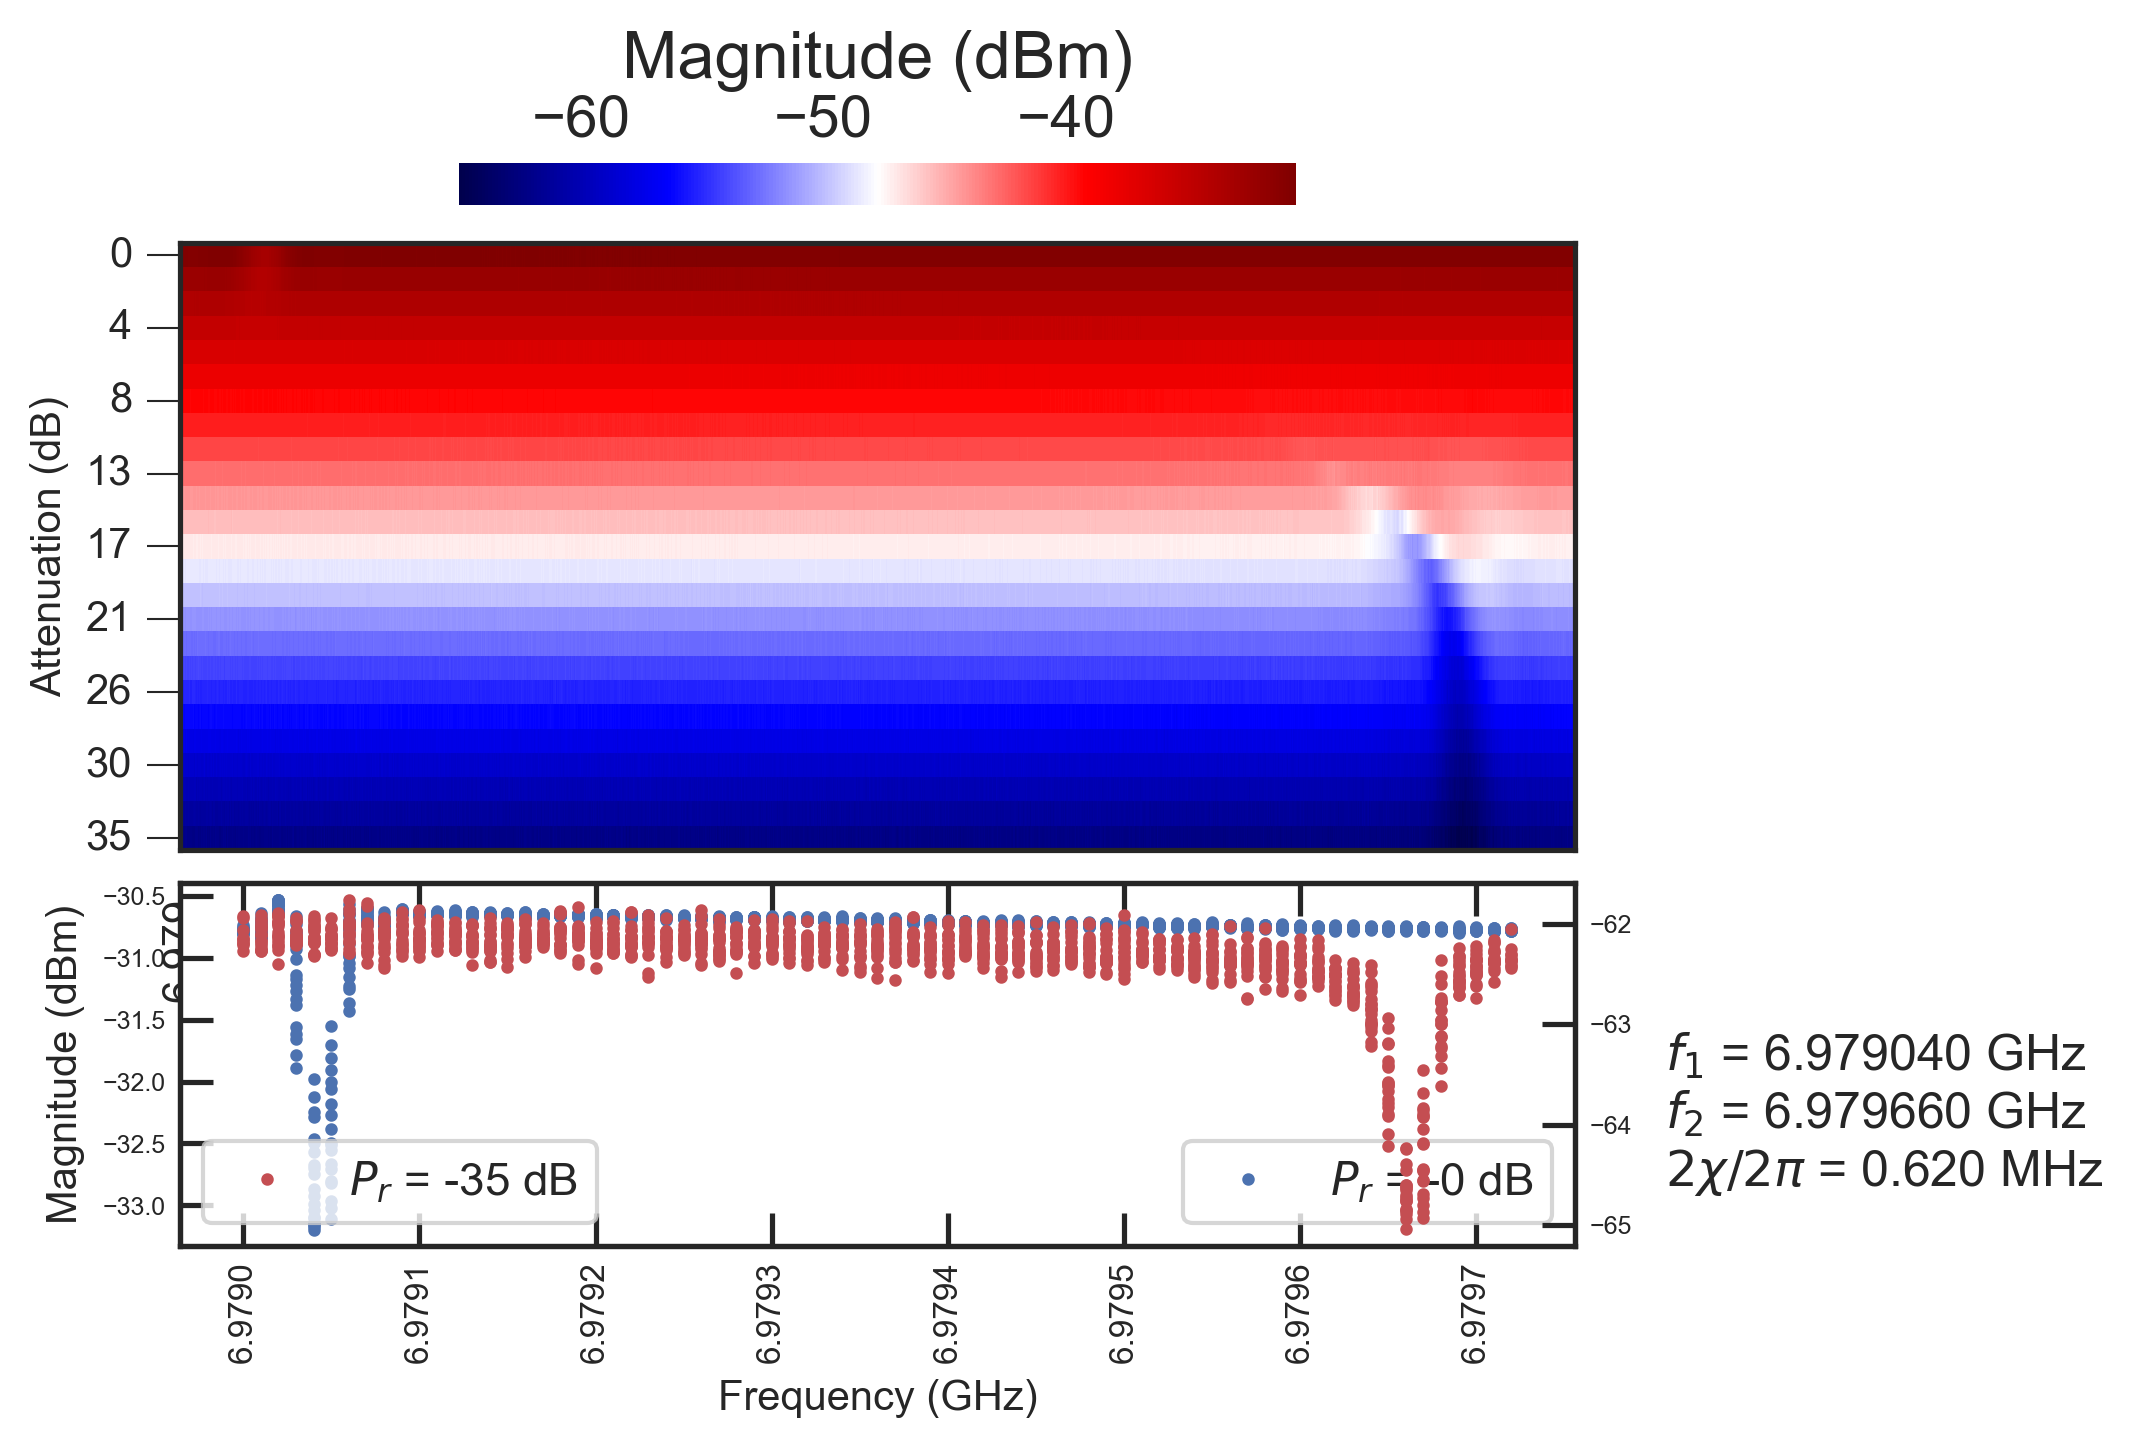

In [105]:
pf.punchout_plot(data,xlabel='Frequency (GHz)',ylabel='Attenuation (dB)',cbar_label='Magnitude (dBm)')

In [106]:
qb.update_value('readout_atten',27)

Updating readout_atten to 27
Setting DA attenuation to 27.


# Qubit Spectroscopy

The first time we run qubit spectroscopy we have to use a high qubit driving amplitude for a couple of reasons. 
1. Detect higher levels like $\omega_{02}/2$ and $\omega_{03}/3$ so you can calculate anharmonicity.
2. Since you don't know exactly what the qubit frequency is going to be (unless you've nailed the fab process), you will have to execute a broad sweep. Driving the qubit at high power broadens the resonance (decreases coherence), makes it easier to detect $\omega_{01}$ -> frequency spacing can be larger.

Due to the negative anharmonicity of the transmon (assuming the device you are working with is a transmon!), the $\omega_{02}/2$ peak is going to have smaller frequency than the $\omega_{01}$ resonance. Keep that in mind when setting up the frequency sweep. 

The *on_off* option of the qubit spectroscopy experiment is there to help distinguish small signals. The off measurement consists of no qubit excitation; just a readout pulse. The on measurement is the regular qubit excitation, followed by readout. The difference between the measurements results is what is saved as our data. The measurement will take almost twice as long, but it might be needed when doing spectroscopy at low powers.

**Some important parameters to setup properly before executing qubit spectroscopy**
1. qubit reset time (qb.pars['resettime']['qubit']): time to wait after performing an ON measurement.
2. amp_q_scaling: explained above
3. 


In [224]:
amp_q_scaling = 0.75
qb.update_value('n_avg',10000)
# qb.update_value('rr_freq', 6.4e9)
# qb.update_value('rr_IF', 50e6)
qb.update_value('readout_length', 5000)
qb.pars['resettime']['rr'] = 500
qb.pars['resettime']['qubit'] = 2500
# qb.update_value('tof',240)
# qb.update_value('readout_atten',10)
# qb.update_value('rr_LO', qb.pars['rr_freq'] - qb.pars['rr_IF'])
# qb.pars['resettime']['qubit'] = int(20e3)
qb.write_pars()
qb.experiment = 'qubit_spec'
%matplotlib qt5
data, job = qb.qubit_spec(element='qubit',
                                check_mixers=False,
                                IF_min=50e6,
                                IF_max=225e6,
                                f_LO=5e9,
                                df=0.05e6,
                                on_off=True,
                                amp_q_scaling = amp_q_scaling,
                                saturation_dur = 5e3,
                                liveplot=True,
                                simulate=False,
                                showprogress=True,
                                savedata=False)
# %matplotlib inline

Updating n_avg to 10000
Updating readout_length to 5000
Updating qubit_LO to 5000000000.0
Setting qubit_LO frequency to 5000000000.0.
Performing two-tone pulsed spectroscopy on qubit using rr for readout
Reset time for qubit is 2500 and for rr is 500
2024-10-10 17:41:22,375 - qm - INFO     - Performing health check
2024-10-10 17:41:22,387 - qm - INFO     - Health check passed
2024-10-10 17:41:22,704 - qm - INFO     - Simulating program


In [178]:
qb.pars['tof']

240

In [153]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,find_peaks=True, amp_q_scaling=amp_q_scaling)

Peak threshold at 0.07919435655236128


## Run broad spectroscopy scan on qubit

In [73]:
qb._instruments.set('sa','frequency',6e9)

Setting sa frequency to 6000000000.0.


In [17]:
qb.update_value('n_avg',20000)
# qb.update_value('readout_length',5000)
# qb.update_value('readout_atten',20)
# qb.update_value('rr_freq', 6.464e9)
# qb.update_value('rr_IF', 50e6)
# qb.update_value('rr_LO', qb.pars['rr_freq'] - qb.pars['rr_IF'])
qb.pars['resettime']['qubit'] = int(20e3)
qb.write_pars()
df_qubit_spec = .5e6
data, job = qb.run_scan(df = df_qubit_spec, element='qubit',
                                check_mixers=False,
                                chunksize = 200e6,
                                lo_min = 6.6e9,
                                lo_max = 7.2e9,
                                amp_q_scaling = 1,
                                on_off=True,
                                saturation_dur = 20e3,                   
                                showprogress=True,
                                savedata=False)

Updating n_avg to 20000


  0%|          | 0/4 [00:00<?, ?it/s]

Updating qubit_LO to 6600000000.0
Setting qubit_LO frequency to 6600000000.0.
Performing two-tone spectroscopy on qubit using rr for readout
Performing two-tone pulsed spectroscopy on qubit using rr for readout
2024-09-25 21:00:46,312 - qm - INFO     - Performing health check
2024-09-25 21:00:46,324 - qm - INFO     - Health check passed
2024-09-25 21:00:47,101 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 21:00:47,402 - qm - INFO     - Executing program


 25%|██▌       | 1/4 [32:03<1:36:09, 1923.33s/it]

Updating qubit_LO to 6800000000.0
Setting qubit_LO frequency to 6800000000.0.
Performing two-tone spectroscopy on qubit using rr for readout
Performing two-tone pulsed spectroscopy on qubit using rr for readout
2024-09-25 21:32:49,683 - qm - INFO     - Performing health check
2024-09-25 21:32:49,695 - qm - INFO     - Health check passed
2024-09-25 21:32:50,461 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 21:32:50,816 - qm - INFO     - Executing program


 50%|█████     | 2/4 [1:04:06<1:04:06, 1923.42s/it]

Updating qubit_LO to 7000000000.0
Setting qubit_LO frequency to 7000000000.0.
Performing two-tone spectroscopy on qubit using rr for readout
Performing two-tone pulsed spectroscopy on qubit using rr for readout
2024-09-25 22:04:53,125 - qm - INFO     - Performing health check
2024-09-25 22:04:53,159 - qm - INFO     - Health check passed
2024-09-25 22:04:53,815 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 22:04:54,159 - qm - INFO     - Executing program


 75%|███████▌  | 3/4 [1:36:10<32:03, 1923.39s/it]  

Updating qubit_LO to 7200000000.0
Setting qubit_LO frequency to 7200000000.0.
Performing two-tone spectroscopy on qubit using rr for readout
Performing two-tone pulsed spectroscopy on qubit using rr for readout
2024-09-25 22:36:56,475 - qm - INFO     - Performing health check
2024-09-25 22:36:56,510 - qm - INFO     - Health check passed
2024-09-25 22:36:57,307 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 22:36:57,623 - qm - INFO     - Executing program


100%|██████████| 4/4 [2:08:13<00:00, 1923.41s/it]


Peak threshold at 0.09385692275016798


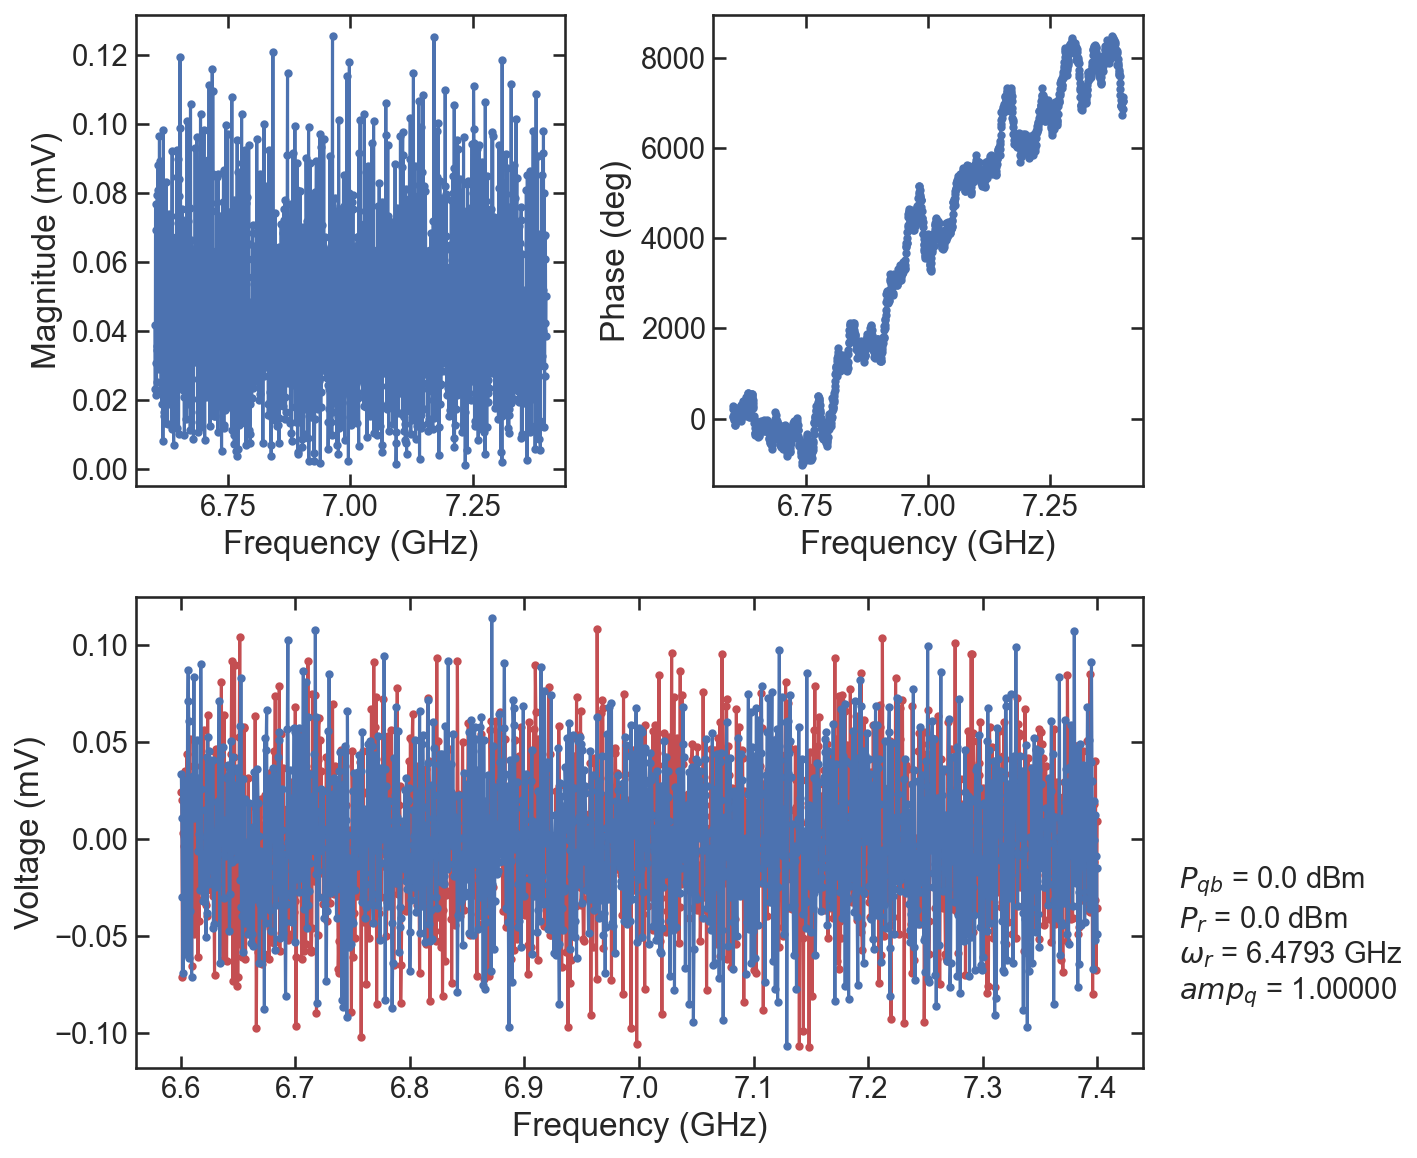

In [18]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,df=df_qubit_spec,rrFreq=qb.pars['rr_freq'],amp_q_scaling=1)

In [ ]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,df=df_qubit_spec,rrFreq=qb.pars['rr_freq'],amp_q_scaling=1)

In [ ]:
data['freqs']